In [1]:
import sys, os
%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import torch
import torch.nn.functional as F
from torch.autograd import Variable, grad
import torch.distributions as distrib
import torch.nn as nn
import torch.utils.data as td
from torch.utils.data import Dataset, DataLoader
import gym
import numpy as np

import foundation as fd
import torch.multiprocessing as mp
import time
import pickle

import foundation.models.networks as nets
from foundation.lattice.core import Expansion
from foundation import util

C:\Users\anwan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
B = 1000
num_iters = 10000
cuda = False #torch.cuda.is_available()
print(cuda)

False


In [22]:
model = Expansion(1,1, terms=5)
def_type = 'torch.FloatTensor'
if cuda:
    model.cuda()
    def_type = 'torch.cuda.FloatTensor'
criterion = nets.get_loss_type('mse')
optim = nets.get_optimizer(parameters=model.parameters(), optim_type='rmsprop', lr=1e-3, weight_decay=1e-4)
target = torch.sin
#print(model)

In [25]:
print_freq = max(num_iters//100, 1)
for itr in range(num_iters):
    
    X = torch.rand(B, 1).type(def_type)*2*np.pi
    Y = target(X)
    
    Y_pred = model(X)
    
    loss = criterion(Y_pred, Y)
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if itr % print_freq == 0:
        print('Itr {}/{}: loss={:.5f}, grads={:.5f}'.format(itr+1, num_iters, loss.item()))

Itr 1/10000: loss=0.00228
Itr 101/10000: loss=0.00252
Itr 201/10000: loss=0.00209
Itr 301/10000: loss=0.00328
Itr 401/10000: loss=0.00333
Itr 501/10000: loss=0.00271
Itr 601/10000: loss=0.00212
Itr 701/10000: loss=0.00230
Itr 801/10000: loss=0.00219
Itr 901/10000: loss=0.00249
Itr 1001/10000: loss=0.00211
Itr 1101/10000: loss=0.00232
Itr 1201/10000: loss=0.00202
Itr 1301/10000: loss=0.00223
Itr 1401/10000: loss=0.00191
Itr 1501/10000: loss=0.00211
Itr 1601/10000: loss=0.00225
Itr 1701/10000: loss=0.00228
Itr 1801/10000: loss=0.00264
Itr 1901/10000: loss=0.00213
Itr 2001/10000: loss=0.00222
Itr 2101/10000: loss=0.00211
Itr 2201/10000: loss=0.00215
Itr 2301/10000: loss=0.00207
Itr 2401/10000: loss=0.00214
Itr 2501/10000: loss=0.00227
Itr 2601/10000: loss=0.00217
Itr 2701/10000: loss=0.00185
Itr 2801/10000: loss=0.00239
Itr 2901/10000: loss=0.00218
Itr 3001/10000: loss=0.00202
Itr 3101/10000: loss=0.00195
Itr 3201/10000: loss=0.00227
Itr 3301/10000: loss=0.00266
Itr 3401/10000: loss=0.002

<IPython.core.display.Javascript object>


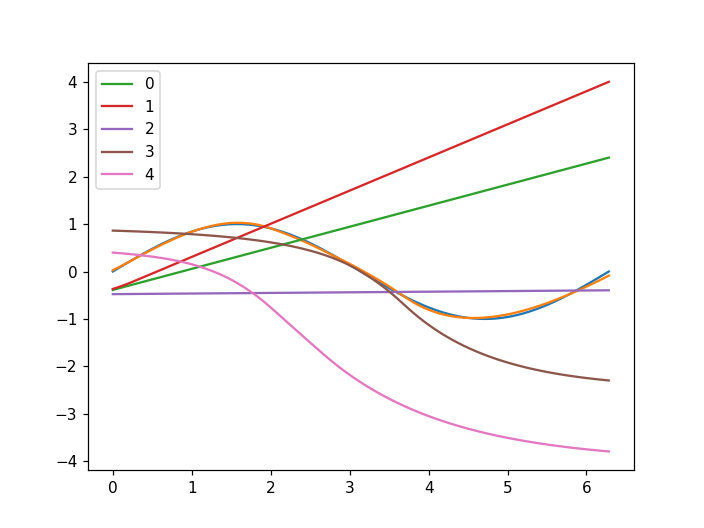

In [26]:
x = torch.linspace(0, 2*np.pi, steps=100).type(def_type).view(-1,1)
y = util.to_np(target(x))[:,0]
y_pred = util.to_np(model(x))[:,0]
full_y = util.to_np(model(x, combined=False))[:,:,0]
x = util.to_np(x)[:,0]

plt.figure()
plt.plot(x, y)
plt.plot(x, y_pred)
for i,comp in enumerate(full_y):
    plt.plot(x, comp, label=str(i))
plt.legend()

In [8]:
#pickle.dump(model, open('sin_exp_3.p','wb'))